# Analysis Preparation on  COVID-19 datasets


In this project, we want to specify the most affected countries in one day, different features, to calculation maximum, minmum , mean for Confirmed,Deaths, Recovered and Active, check missing values,check missing values, Seperate dates to see how many days, how many months, how many years.

**Data Description**

The data contains 10 column and 490,69 row.

**The data contains the following columns:**
1) Province/State
2) Country/Region
3) Lat
4) Long
5) Date
6) Confirmed
7) Deaths
8) Recovered
9) Active
10) WHO Region

**The question will disscuse about it in the data is:**
- what is the Maximum,Minimum,median for the Confirmed,Deaths,Recovered, Active?
- Comaper between Deaths and Active?
- How many the Total Corona Virus Active vs Recovered?

**Algorithms for this project**
 
 LinearRegression will help to predict active case of the COVID-19  per month

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import statistics
from sklearn import ensemble, tree, linear_model
from scipy.stats import pearsonr
from scipy.stats import norm




# General Properties

In [60]:
df = pd.read_csv('covid_19_clean_complete.csv') # Load dataset anto a dataframe

In [61]:
df.head() # Shows the first 5 rows of data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [62]:
df.dtypes# check datatype

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [63]:
df.info() # show information about the coulmn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [64]:
df.describe() # describe data

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [65]:
df.columns  # describe columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

# Shape of the data

In [66]:
df.shape # check the shape data

(49068, 10)

# Check data and missing

In [67]:
df.isnull().sum() # check missing values in numerical variables

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [68]:
df['Date'].nunique() # nunique for date column

188

In [69]:
x=df.groupby(['Country/Region'])['Country/Region'].count()
print(x) # groupby Country/Region

Country/Region
Afghanistan           188
Albania               188
Algeria               188
Andorra               188
Angola                188
                     ... 
West Bank and Gaza    188
Western Sahara        188
Yemen                 188
Zambia                188
Zimbabwe              188
Name: Country/Region, Length: 187, dtype: int64


In [70]:
df.groupby('WHO Region').mean()

,Lat,Long,Confirmed,Deaths,Recovered,Active
WHO Region,,,,,,
Africa,0.523869,15.712238,2414.874446,48.756427,1240.439938,1125.678081
Americas,18.664683,-77.517460,46514.939177,2238.586031,18162.516651,26113.836494
Eastern Mediterranean,26.161731,41.049556,17911.724371,465.190764,11617.674807,5828.858801
Europe,37.765059,6.865596,16547.858577,1281.319149,8191.627327,7074.912101
South-East Asia,13.915815,93.459266,29318.279255,775.603191,15973.578191,12569.097872
Western Pacific,17.719302,119.373725,2550.716731,90.176983,1824.173114,636.366634


In [71]:
df.duplicated().sum()# Check Duplicates


0

In [72]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  34404
since it is only 70 percent of the entire dataset the rows with missing values are excluded.


  Here we can make agroupby (Date)

In [73]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
total #  Here we can make agroupby (Date)


<ipython-input-73-54a4f2c9bd2c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


what is the Maximum,Minimum,median for the Confirmed,Deaths,Recovered, Active?

In [74]:
ma=df.Confirmed.max()
print('The Maximum number of Confirmed case=', ma)
mi=df.Confirmed.min()
print('The Minimum number of Confirmed case=',mi)
me=df.Confirmed.median()
print('The median number of Confirmed case=',me)

print('----------------------------------------------------')

ma=df.Deaths.max()
print('The Maximum number of Deaths case=', ma)
mi=df.Deaths.min()
print('The Minimum number of of Deaths case=',mi)
me=df.Deaths.median()
print('The median number of Deaths case=',me)

print('----------------------------------------------------')

ma=df.Recovered.max()
print('The Maximum number of Recovered case=', ma)
mi=df.Recovered.min()
print('The Minimum number of Recovered case=',mi)
me=df.Recovered.median()
print('The median number of Recovered case=',me)

print('----------------------------------------------------')

ma=df.Active.max()
print('The Maximum number of Active case=', ma)
mi=df.Recovered.min()
print('The Minimum number of Active case=',mi)
me=df.Recovered.median()
print('The median number of Active case=',me)

The Maximum number of Confirmed case= 4290259
The Minimum number of Confirmed case= 0
The median number of Confirmed case= 168.0
----------------------------------------------------
The Maximum number of Deaths case= 148011
The Minimum number of of Deaths case= 0
The median number of Deaths case= 2.0
----------------------------------------------------
The Maximum number of Recovered case= 1846641
The Minimum number of Recovered case= 0
The median number of Recovered case= 29.0
----------------------------------------------------
The Maximum number of Active case= 2816444
The Minimum number of Active case= 0
The median number of Active case= 29.0


In [75]:
df['Date'].dtypes #check datatype for the date

dtype('O')

In [76]:
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Year, dtype: int64

In [78]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [79]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    22
1    22
2    22
3    22
4    22
Name: Day, dtype: int64

In [80]:
df.head() # Data after extract date to parts 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month,Day
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020,1,22
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2020,1,22
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,2020,1,22
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,2020,1,22
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,2020,1,22


# Data visualization

<AxesSubplot:>

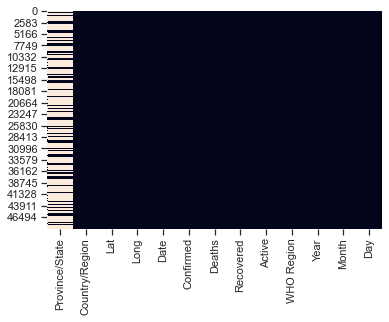

In [81]:
sns.set_style("ticks") # darkgrid, whitegrid, dark, white, ticks
# 
sns.heatmap(df.isnull(), cbar=False)

C:\Users\Asma-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deaths', ylabel='Recovered'>

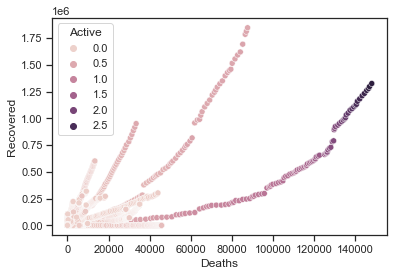

In [82]:
sns.scatterplot(df['Deaths'], df['Recovered'], hue = df['Active'])

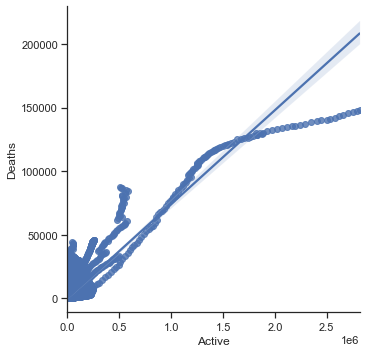

In [83]:
sns.lmplot(x = 'Active', y = 'Deaths', data = df)

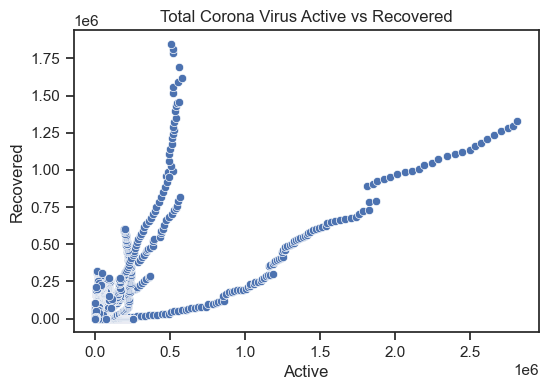

In [84]:
plt.figure(dpi=100)
# Add title
plt.title("Total Corona Virus Active vs Recovered")
sns.scatterplot(x = df['Active'], y = df['Recovered'])
plt.show()

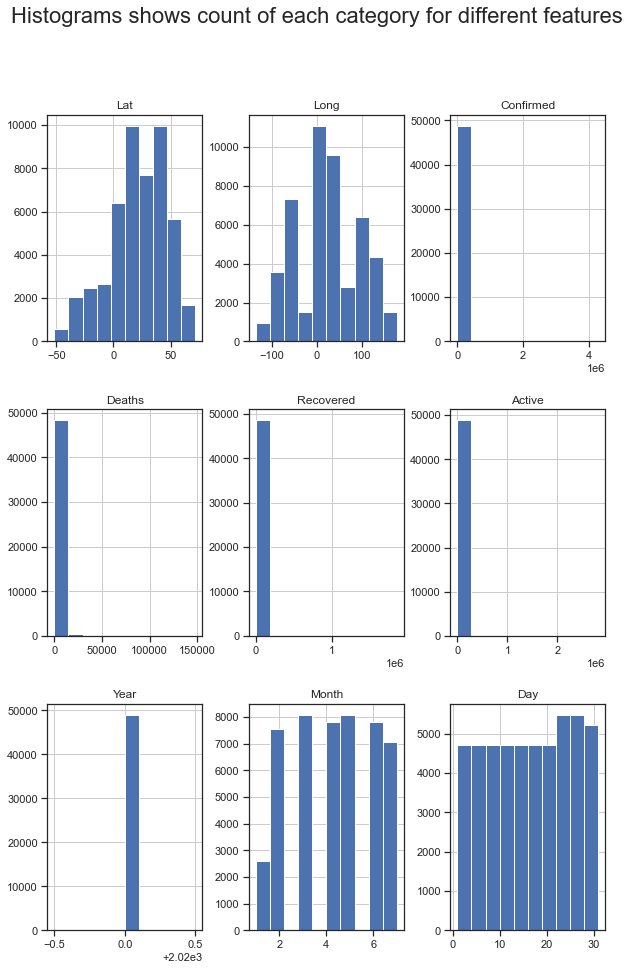

In [85]:
df.hist(figsize=(10,15))
plt.suptitle('Histograms shows count of each category for different features', fontsize=22)
plt.show()

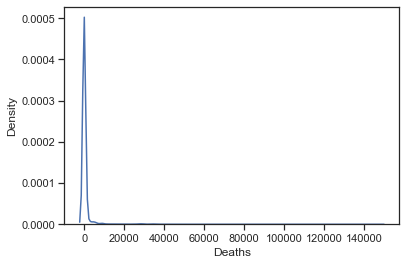

In [86]:
sns.kdeplot(df['Deaths']);


In [87]:
#g = sns.FacetGrid(df, col='Active', sharex=True, sharey=True)
#g.map(sns.histplot, 'Lat',stat='density', kde=True);


<AxesSubplot:>

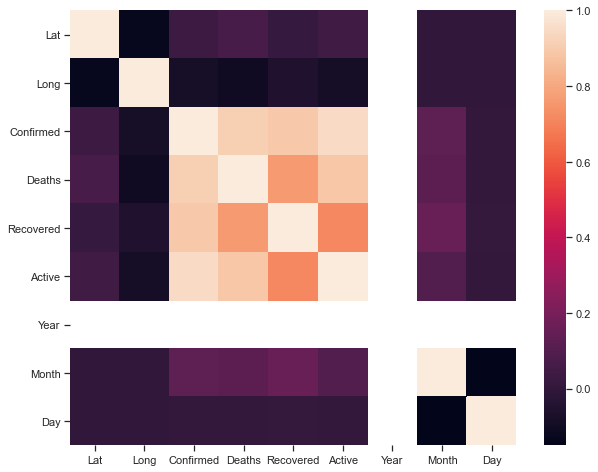

In [88]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr())

# Data Modeling

** Import LinearRegression from sklearn.linear_model **

In [89]:
Y = df['Month']
X = df.drop(['Confirmed', 'Deaths', 'Recovered'],  axis=1)

In [90]:
dataset = df.drop(['Confirmed', 'Deaths'], axis=1)
print (dataset)

      Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1                NaN                Albania  41.153300  20.168300 2020-01-22   
2                NaN                Algeria  28.033900   1.659600 2020-01-22   
3                NaN                Andorra  42.506300   1.521800 2020-01-22   
4                NaN                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065            NaN                Comoros -11.645500  43.333300 2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Recovered  Active             WH

In [91]:
df.corr(method='pearson')

,Lat,Long,Confirmed,Deaths,Recovered,Active,Year,Month,Day
Lat,1.000000e+00,-1.272594e-01,0.036665,0.070040,0.015329,0.044392,NaN,1.070865e-17,-3.123648e-18
Long,-1.272594e-01,1.000000e+00,-0.078911,-0.101340,-0.052391,-0.085688,NaN,9.593322e-18,4.211018e-18
Confirmed,3.666534e-02,-7.891069e-02,1.000000,0.912361,0.895506,0.950255,NaN,1.309533e-01,5.779996e-03
Deaths,7.003977e-02,-1.013400e-01,0.912361,1.000000,0.763090,0.891858,NaN,1.259501e-01,3.533142e-03
Recovered,1.532882e-02,-5.239063e-02,0.895506,0.763090,1.000000,0.713088,NaN,1.587554e-01,8.423441e-03
Active,4.439180e-02,-8.568801e-02,0.950255,0.891858,0.713088,1.000000,NaN,9.409061e-02,3.302901e-03
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,1.070865e-17,9.593322e-18,0.130953,0.125950,0.158755,0.094091,NaN,1.000000e+00,-1.496819e-01
Day,-3.123648e-18,4.211018e-18,0.005780,0.003533,0.008423,0.003303,NaN,-1.496819e-01,1.000000e+00


In [92]:
import statsmodels.api as sml 
from statsmodels import tools

In [93]:
x = X['Active']
y = Y

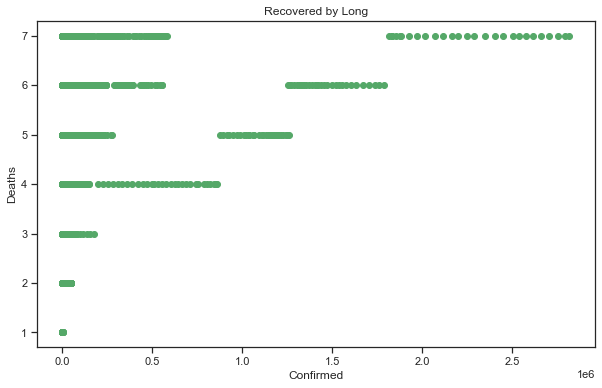

In [94]:
plt.figure(figsize=(10,6))
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Recovered by Long')
plt.scatter(x,y, marker='o', color='g')

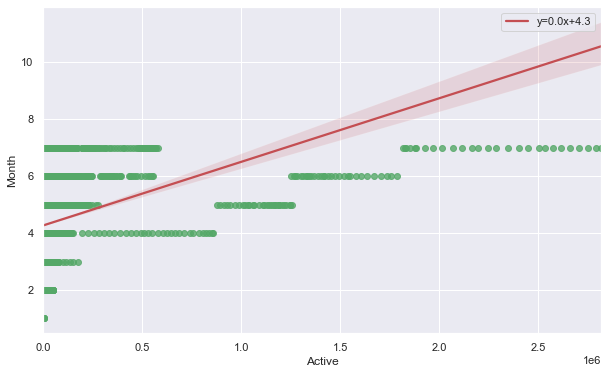

In [95]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Active'],df['Month'])

f = plt.figure(figsize=(10,6))
data = df[['Active','Month']]
ax = sns.regplot(x='Active', y='Month', data=data, 
                 scatter_kws={"color": "g"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [96]:
print(slope, intercept)

2.233532171231096e-06 4.26385676006672


In [97]:
print(std_err)

1.0669022393188582e-07


In [98]:
#sns.jointplot(x = 'Active', y = 'Confirmed', data = df, kind='reg')


# CONCLUSION

Statistical visualization helps in analyzing data and comparing cases in terms of deaths and active cases. The data was predicted using Linear Regression model